In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , models , layers
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

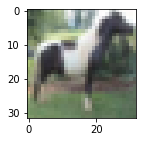

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[362])

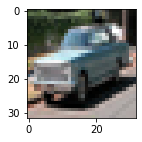

In [5]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[32])

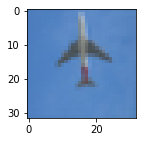

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1243])

# Pre procssing the training data

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Its a 2D array we have to convert it into a 1D array

In [11]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
model_drop = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(4, 4), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(4, 4), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(30, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


model_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])    

model_drop.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 18s 10ms/step - loss: 1.6601 - accuracy: 0.3850
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2831 - accuracy: 0.5407
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1423 - accuracy: 0.5969
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0540 - accuracy: 0.6311
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9890 - accuracy: 0.6573
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9339 - accuracy: 0.6750
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8813 - accuracy: 0.6939
Epoch 8/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8337 - accuracy: 0.7112
Epoch 9/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8016 - accuracy: 0.7214
Epoch 10/100
1563/1563 [==============================]

1563/1563 [==============================] - 18s 12ms/step - loss: 0.2474 - accuracy: 0.9168
Epoch 79/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2374 - accuracy: 0.9201
Epoch 80/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2389 - accuracy: 0.9196
Epoch 81/100
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2425 - accuracy: 0.9199
Epoch 82/100
1563/1563 [==============================] - 20s 12ms/step - loss: 0.2307 - accuracy: 0.9225
Epoch 83/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2421 - accuracy: 0.9182
Epoch 84/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2355 - accuracy: 0.9210
Epoch 85/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2378 - accuracy: 0.9202
Epoch 86/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2326 - accuracy: 0.9204
Epoch 87/100
1563/1563 [==============================] - 1

In [19]:
model_drop.evaluate(X_test,y_test)

313/313 [==============================] - 11s 5ms/step - loss: 1.9224 - accuracy: 0.7045


[1.9224051237106323, 0.7045000195503235]